# CTSM Simulations at NEON Tower Sites -- Tutorial 

This tutorial is an introduction to running the Community Terrestrial Systems Model (CTSM) at NEON tower sites.  It will guide you through running a simulation and provides example visualization of the simulation results.

There are several configuration options of CTSM, and throughout this tutorial we will use the Community Land Model, CLM, configuration which is the climate and biogeochemistry mode of CTSM. Throughout the rest of this tutorial, we refer to the model as CLM version 5.1 (CLM5.1-BGC).
***

## In this tutorial

The tutorial has several components. Below you will find steps to: 
1. Set up and run a simulation
2. Explore CLM model data
3. Explore NEON observation data
4. Compare CLM and NEON latent heat flux data

Note that step 1 is the necessary step to run the simulation. If you would like to use this tutorial to explore the available data, please continue with steps 2-4.

***
**The tutorial uses a Jupyter Notebook.** A Jupyter Notebook is an interactive computing environment that enables the creation and sharing of documents that contain discrete cells of text or documentation and executable code, including plots. It allows users to access, run, and edit the code in a browser. To interact with this notebook:

- Execute or "run" cells of executable code (cells denoted with '[ ]:') using the play button in the menu at the top (see below image)

- The results of running code, such as plots, will appear below that cell

- Each step must be followed in order, otherwise you may encounter errors

![run cell](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/images/run_cell.png)

For more information on Jupyter notebooks please see their [user guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html). 
***

<h2> 1. Set up and run a simulation</h2>

*This step guides you through running a CLM model simulation for a NEON flux tower using meteorology observations from the tower. Here, the many steps to run CLM are condensed into a single function. If you would like a more advanced tutorial to change the model configuration or code, please see [tutorial not yet available] for additional instructions.* <br>

***
<h4>1.1 Select a NEON tower site to simulate.</h4>

NEON towers available for simulation include:  

>ABBY, BART, BLAN, CPER, DCFS, DSNY, GRSM, HARV, JERC, JORN, KONZ, MOAB, NOGP, OAES, ORNL, OSBS, SCBI, SERC, SOAP, SRER, STEI, TALL, TREE, UKFS, UNDE, WOOD.  

The [NEON website](https://www.neonscience.org/field-sites/explore-field-sites) describes tower sites in more detail.

Before running the below code, keep in mind:
- The executable code below selects the **ABBY** site for simulation. If you would like to simulate a different tower, select the NEON tower from the above list and change the 4-character site name inside the quotes below.
- The site must be defined correctly so you do not get an error in the next step.
    - use all capital letters 
    - double-check that the letters match one of the above site names

*Execute the the cell below by clicking on the play button in the menu bar above.*

In [37]:
#Change the 4-character NEON site below.
neon_site = "ABBY"

import os
os.environ['site'] = neon_site

***
<h4>1.2 Create and run a NEON tower site simulation.</h4>  

The executable code below runs a python script, run_neon.py. This script

* creates (`create_newcase`)
* sets up (`case.setup`)
* compiles (`case.build`)
* runs (`case.submit`)
    
a simulation for the tower site you specified above for all years that tower meteorology data are available.

*Run the cell below. Note that this step downloads the input data (~7GB) required for the model simulation. It may take several minutes to run, so please be patient. Many things will print below the cell as data are downloaded and the model compiles.* 

In [ ]:
run_neon --neon-sites $site --output-root ~/CLM-NEON #>& run_neon.log

<br><br>You might see lines print that say 'ERROR 404: Not Found' and this is ok. You will also likely notice that many files are moved after the simulation completes. The model is done running when you see: 

>st_archive completed <br>
>Submitted job case.run with id None <br>
>Submitted job case.st_archive with id None <br>


If you see this message, great! You've created and run CTSM for the NEON tower you selected, and we'll look at simulation data next.

**Note** that you can also run the above line of code in your terminal shell but you will need to point to the location of the file:
`/opt/ncar/cesm2/tools/site_and_regional/run_neon.py --neon-sites <site> --output-root <path>`

More details about setting up and modifying simulations will be available in an upcoming tutorial. 

Additional information about CLM is available [on the website](https://www.cesm.ucar.edu/models/cesm2/land/), including [technical documentation](https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/tech_note/index.html), a [user's guide](https://escomp.github.io/ctsm-docs/versions/release-clm5.0/html/users_guide/index.html), and a [quickstart guide](https://escomp.github.io/CESM/release-cesm2/quickstart.html#create-a-case) to running other model configurations.
<br><br>
***

<h4> Optional </h4>

If you would like to see additional and more advanced options for running NEON tower site simulations, many are listed in the python script you just executed using a `--help` option. <p>

*Executing the below cell is optional and will print options available options in the `run_neon` python script*:

In [6]:
run_neon --help

usage: run_neon.py [-h] [-d] [-v] [-s]
                   [--neon-sites {ABBY,BARR,BART,BLAN,BONA,CLBJ,CPER,DCFS,DEJU,DELA,DSNY,GRSM,GUAN,HARV,HEAL,JERC,JORN,KONA,KONZ,LAJA,LENO,MLBS,MOAB,NIWO,NOGP,OAES,ONAQ,ORNL,OSBS,PUUM,RMNP,SCBI,SERC,SJER,SOAP,SRER,STEI,STER,TALL,TEAK,TOOL,TREE,UKFS,UNDE,WOOD,WREF,YELL,all} [{ABBY,BARR,BART,BLAN,BONA,CLBJ,CPER,DCFS,DEJU,DELA,DSNY,GRSM,GUAN,HARV,HEAL,JERC,JORN,KONA,KONZ,LAJA,LENO,MLBS,MOAB,NIWO,NOGP,OAES,ONAQ,ORNL,OSBS,PUUM,RMNP,SCBI,SERC,SJER,SOAP,SRER,STEI,STER,TALL,TEAK,TOOL,TREE,UKFS,UNDE,WOOD,WREF,YELL,all} ...]]
                   [--base-case BASE_CASE_ROOT] [--output-root OUTPUT_ROOT]
                   [--overwrite] [--setup-only] [--rerun] [--no-batch]
                   [--run-type {ad,postad,transient,sasu}]
                   [--run-length RUN_LENGTH] [--start-date START_DATE]
                   [--end-date END_DATE] [--run-from-postad]

|------------------------------------------------------------------|
|---------------------  Instruc

________
<h2> 2. Explore CTSM model data </h2>

Now that your simulation completed, we can explore the data.
There are countless ways of analyzing and processing model data. This tutorial uses matplotlib. 
***

<h4> 2.1 Locate model data </h4>
When the simulation completed, the data are transferred to the `archive` directory. There are files that include data for every day of the simulation, as well as files that average model variables monthly. <p>

*Run the code below to see a subset of the files listed.*

In [38]:
!ls ~/archive/$site.transient/lnd/hist/*2018*.nc |head -20

/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-01.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-02.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-03.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-04.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-05.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-06.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-07.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-08.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-09.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-10.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-11.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h0.2018-12.nc
/home/user/archive/ABBY.transient/lnd/hist/ABBY.transient.clm2.h1.2018-01-01

The list includes the file path and file names.

The file names are automatically generated and include
* the simulation name, which includes
    * the NEON site
    * the type of simulation (here the simulation is "transient", meaning the model ran for the full length of available data)
* the date of simulated data

The files are saved in netcdf format (denoted with the `.nc` file extension), a file format commonly used for storing large, multi-dimensional scientific variables.
Netcdf files are platform independent and self-describing; each file includes metadata that describes the data, including: **variables**, **dimensions**, and **attributes**.

The NEON tower simulations generate two types of files:
* `*h0*`: Variables that are averaged monthly. One file is available for every month of the simulation.
* `*h1*`: Variables that are recorded every 30 minutes. Values are aggregated into one file for each day of the simulation. Each file includes 48 data points.
****


<h4>2.2 Visualize the output </h4>
Here let's take a quick look at our ouput and try visualizing it. 

Here we are going to use the existing function, `quick_soil_profile` to check the soil_profile . 

This function takes the simulation path and name of a case and one variable such as soil temperature `TSOI` in this case- and plots the soil profile with x-axis showing time and y-axis representing soil depth. 

We'll look at more advanced visualizations in the next tutorial lessons.


All Simulation files: [ 365 files]
Reading all simulation files [ 365 files] took: 40.645915031433105 s.


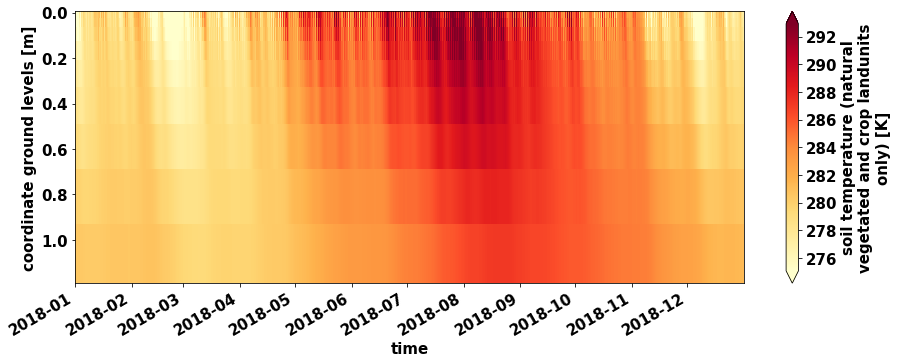

In [36]:
from neon_utils import quick_soil_profile

sim_path = "/home/user/archive/"+neon_site+".transient/lnd/hist/"
case_name = neon_site+".transient.clm2"
year = 2018

quick_soil_profile(sim_path, case_name, 'TSOI', year)

#### Congratulations! 
You have now completed a neon simulation and walked through the basic steps of a neon simulation.

Please proceed to the next notebook for simple visualization and evaluation of your neon simulation against neon observation. 
